# 통신사 고객 이탈률예측

## 패키지 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus']= False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [3]:
df = pd.read_csv('./files/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 전처리 

In [6]:
df.drop('customerID',axis=1,inplace=True)

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors='coerce')

In [8]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# 
df = df.replace({'Yes':1,'No':0})

In [10]:
df = df.dropna()

In [11]:
df.columns=['성별','노인여부','파트너','부양가족','개월','전화서비스','여러회선','인터넷서비스','보안','백업','기기보호','기술지원','스트리밍TV','영화스트리밍','계약기간','종이없는결제','결제수단','월청구금액','총청구금액','이탈여부',]

In [12]:
for i in df.columns:
    print(i)
    print(df[i].unique())

성별
['Female' 'Male']
노인여부
[0 1]
파트너
[1 0]
부양가족
[0 1]
개월
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
전화서비스
[0 1]
여러회선
['No phone service' 0 1]
인터넷서비스
['DSL' 'Fiber optic' 0]
보안
[0 1 'No internet service']
백업
[1 0 'No internet service']
기기보호
[0 1 'No internet service']
기술지원
[0 1 'No internet service']
스트리밍TV
[0 1 'No internet service']
영화스트리밍
[0 1 'No internet service']
계약기간
['Month-to-month' 'One year' 'Two year']
종이없는결제
[1 0]
결제수단
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
월청구금액
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
총청구금액
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
이탈여부
[0 1]


In [13]:
df.head()

,성별,노인여부,파트너,부양가족,개월,전화서비스,여러회선,인터넷서비스,보안,백업,기기보호,기술지원,스트리밍TV,영화스트리밍,계약기간,종이없는결제,결제수단,월청구금액,총청구금액,이탈여부
0,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [14]:
df.head(1)

,성별,노인여부,파트너,부양가족,개월,전화서비스,여러회선,인터넷서비스,보안,백업,기기보호,기술지원,스트리밍TV,영화스트리밍,계약기간,종이없는결제,결제수단,월청구금액,총청구금액,이탈여부
0,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0


## 각 컬럼간의 상관관계 확인
- 정규화를 통해 상관관계를 확인 

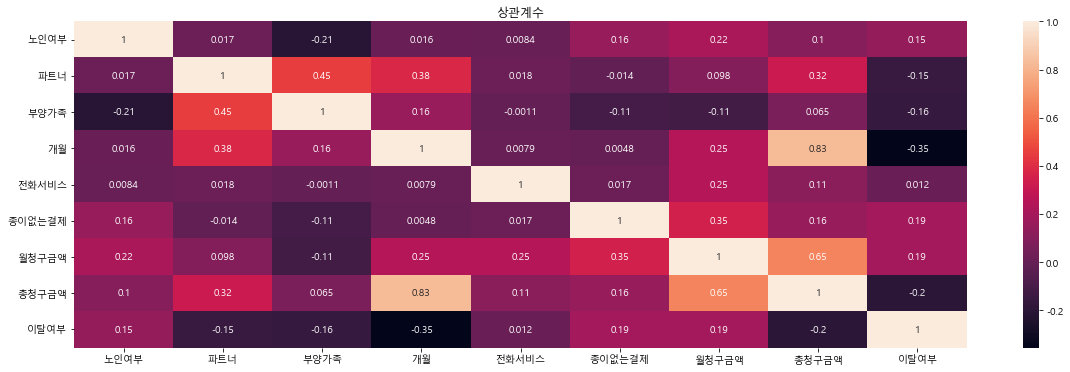

In [15]:
plt.figure(figsize=(20,6))
plt.title('상관계수')
sns.heatmap(df.corr(),annot=True) # annot=True 각셀에 숫자를 입력
plt.show()

### 이탈여부확인

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


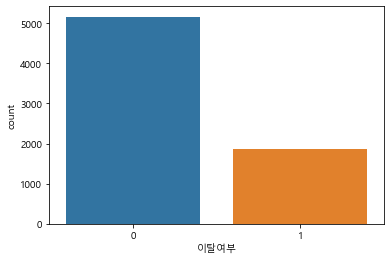

In [16]:
sns.countplot(df.이탈여부)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

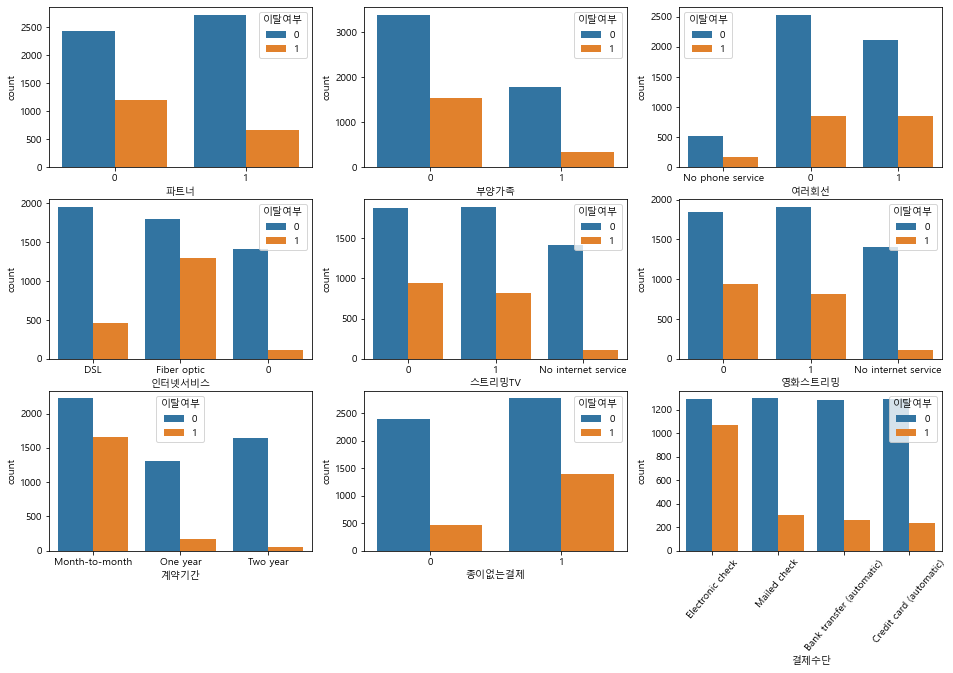

In [17]:
fig,ax = plt.subplots(3,3,figsize=(16,10))
sns.countplot(df.파트너, hue = df.이탈여부,ax=ax[0][0])  
sns.countplot(df.부양가족, hue = df.이탈여부,ax=ax[0][1]) 
sns.countplot(df.여러회선, hue = df.이탈여부,ax=ax[0][2])
sns.countplot(df.인터넷서비스, hue = df.이탈여부,ax=ax[1][0])
sns.countplot(df.스트리밍TV, hue = df.이탈여부,ax=ax[1][1])
sns.countplot(df.영화스트리밍, hue = df.이탈여부,ax=ax[1][2])
sns.countplot(df.계약기간, hue = df.이탈여부,ax=ax[2][0])
sns.countplot(df.종이없는결제, hue = df.이탈여부,ax=ax[2][1])
sns.countplot(df.결제수단, hue = df.이탈여부,ax=ax[2][2])

plt.xticks(rotation=50)
plt.show()

### 개월간 이탈여부

<AxesSubplot:xlabel='개월', ylabel='Count'>

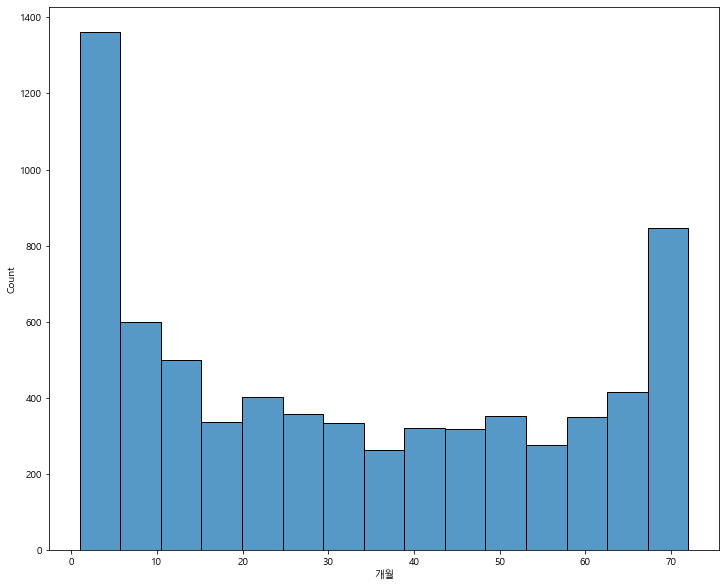

In [18]:
plt.figure(figsize=(12,10))
sns.histplot(df.개월)

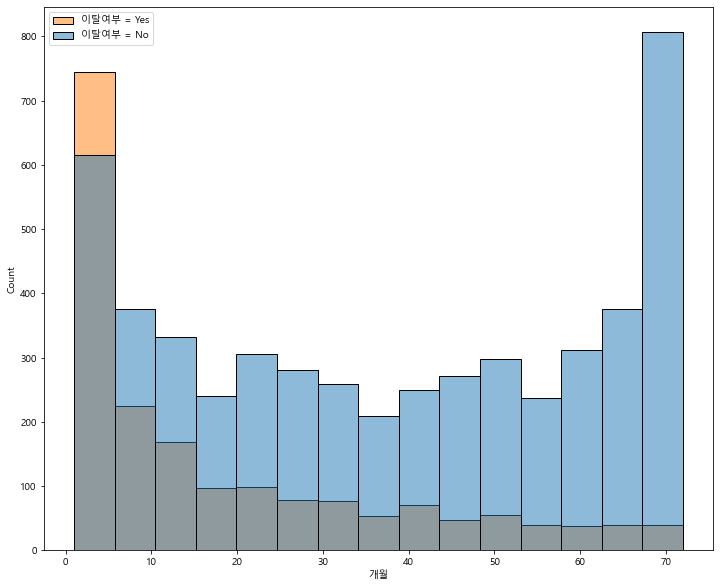

In [19]:
plt.figure(figsize=(12,10))
sns.histplot(x='개월',hue='이탈여부',data=df)
plt.legend(['이탈여부 = Yes','이탈여부 = No'])

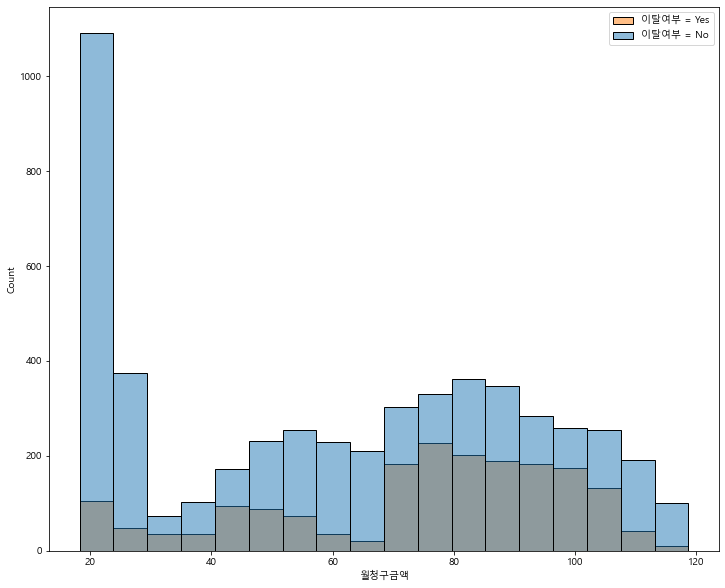

In [20]:
plt.figure(figsize=(12,10))
sns.histplot(x='월청구금액',hue='이탈여부',data=df)
plt.legend(['이탈여부 = Yes','이탈여부 = No'])

### 총금액의 이탈여부ㅡ

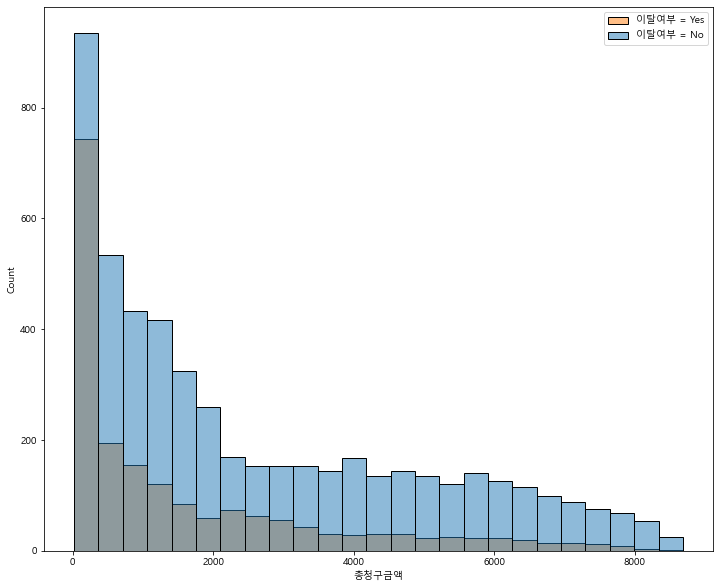

In [21]:
    plt.figure(figsize=(12,10))
    sns.histplot(x='총청구금액',hue='이탈여부',data=df)
    plt.legend(['이탈여부 = Yes','이탈여부 = No'])

### 계약기간 & 이탈여부

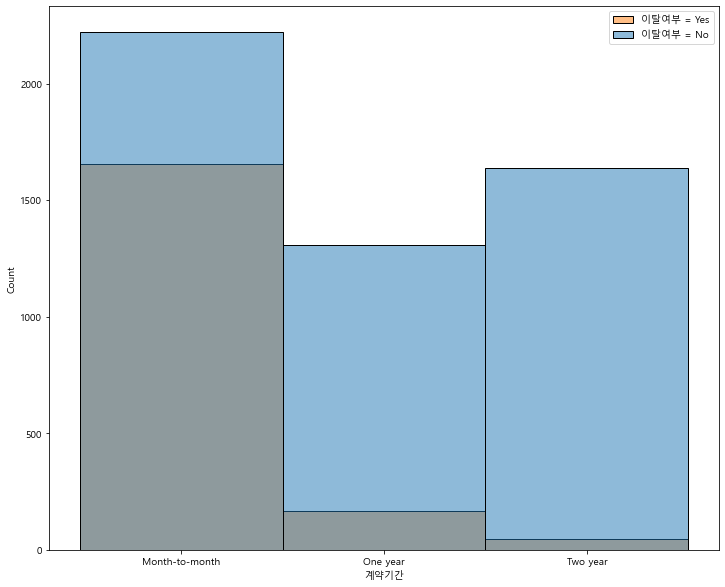

In [22]:
plt.figure(figsize=(12,10))
sns.histplot(x='계약기간',hue='이탈여부',data=df)
plt.legend(['이탈여부 = Yes','이탈여부 = No'])

In [23]:
df2=pd.get_dummies(df)

In [24]:
df2.head(1)

,노인여부,파트너,부양가족,개월,전화서비스,종이없는결제,월청구금액,총청구금액,이탈여부,성별_Female,...,영화스트리밍_0,영화스트리밍_1,영화스트리밍_No internet service,계약기간_Month-to-month,계약기간_One year,계약기간_Two year,결제수단_Bank transfer (automatic),결제수단_Credit card (automatic),결제수단_Electronic check,결제수단_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,1,...,1,0,0,1,0,0,0,0,1,0


# 머신러닝

In [25]:
x = df2.drop('이탈여부', axis=1)
y = df2['이탈여부']

## 패키지

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## 알고리즘

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=11)

### LinearRegression

In [28]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test,y_test)
pred_lr = lr.predict(x_test)
print('MSE:',metrics.mean_squared_error(y_test, pred_lr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred_lr)))
print('MAE:',metrics.mean_absolute_error(y_test,pred_lr))

MSE: 0.1442625389757099
RMSE: 0.3798190871661269
MAE: 0.29981181923654177


### LogisticRegression

In [29]:
y_train.shape

(4922,)

In [30]:
log = LogisticRegression()
log.fit(x_train, y_train)
pred_log = log.predict(x_test)
pred_log_train = log.predict(x_train)
print('정확도:',metrics.accuracy_score(pred_log, y_test))
print(metrics.classification_report(pred_log, y_test))

정확도: 0.79478672985782
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1654
           1       0.52      0.65      0.58       456

    accuracy                           0.79      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.82      0.79      0.80      2110



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### xgboost

In [31]:
xg = XGBClassifier()
xg.fit(x_train, y_train)
pred_xg_train = xg.predict(x_train)
pred_xg = xg.predict(x_test)
print('정확도:',metrics.accuracy_score(y_test, pred_xg))
print(metrics.classification_report(pred_xg,y_test))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:20:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
정확도: 0.771563981042654
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1621
           1       0.51      0.59      0.55       489

    accuracy                           0.77      2110
   macro avg       0.69      0.71      0.70      2110
weighted avg       0.79      0.77      0.78      2110



### LGBClassifier

In [32]:
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)
pred_lgbm=lgbm.predict(x_test)
print('정확도:',metrics.accuracy_score(y_test,pred_lgbm))
print(metrics.classification_report(y_test,pred_lgbm))

정확도: 0.7791469194312797
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1537
           1       0.61      0.50      0.55       573

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



In [33]:
# param_grid = {
#     'max_depth': [4, 5, 6, 7],
#     'max_leaf_nodes': [3, 5, 7, 9, 10],
#     'criterion': ['entropy']
# }

In [34]:
# gs = GridSearchCV(xg,
#                   param_grid=param_grid,
#                   scoring='accuracy',
#                   cv=3,
#                   n_jobs=-1)

### KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
print('정확도:',metrics.accuracy_score(knn_pred,y_test))
print(metrics.classification_report(knn_pred,y_test))

정확도: 0.771563981042654
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1663
           1       0.47      0.60      0.53       447

    accuracy                           0.77      2110
   macro avg       0.68      0.71      0.69      2110
weighted avg       0.80      0.77      0.78      2110



### DecisionTreeClassifier

In [36]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
print('정확도:',metrics.accuracy_score(dt_pred,y_test))
print(metrics.classification_report(dt_pred,y_test))

정확도: 0.7270142180094786
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1527
           1       0.51      0.50      0.50       583

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.73      0.73      0.73      2110



### RandomForestClassifier

In [37]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
print('정확도:',metrics.accuracy_score(rfc_pred,y_test))
print(metrics.classification_report(rfc_pred,y_test))

정확도: 0.7758293838862559
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1664
           1       0.48      0.61      0.54       446

    accuracy                           0.78      2110
   macro avg       0.68      0.72      0.69      2110
weighted avg       0.80      0.78      0.79      2110



### SVC

In [38]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
print('정확도:',metrics.accuracy_score(svc_pred,y_test))
print(metrics.classification_report(svc_pred,y_test))

정확도: 0.728436018957346
              precision    recall  f1-score   support

           0       1.00      0.73      0.84      2110
           1       0.00      0.00      0.00         0

    accuracy                           0.73      2110
   macro avg       0.50      0.36      0.42      2110
weighted avg       1.00      0.73      0.84      2110



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
